In [377]:
# Andrej Karapathy Neural Network Series
# Video Tut 1

In [378]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# the above line makes the plot visible just after the code cell

In [379]:
def f(x):
  return 3*x**2 - 4*x + 5

In [380]:
f(3.0)

20.0

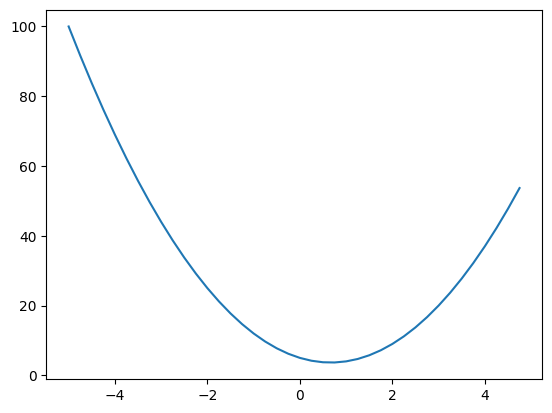

In [381]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [382]:
x = 3
h = 0.000001
(f(x + h) - f(x))/h

14.000003002223593

In [383]:
a = 2
b = -3
c = 10
d = a*b + c
d

4

In [384]:
h = 0.0001

a = 2
b = -3
c = 10
d1 = a*b + c
a += h
d2 = a*b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4
d2 3.999699999999999
slope -3.000000000010772


In [385]:
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})" # this is used to print a meaningful statement for debugging

  def __add__(self, other):
    return Value(self.data + other.data) # internally python for a + b does a.__add__(b)

  def __mul__(self, other):
    return Value(self.data * other.data) # internally python for a * b does a.__mul__(b)

In [386]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a + b
a * b + c

Value(data=4.0)

In [387]:
class Value:
  def __init__(self, data, _children=()):
    self.data = data
    self._prev = set(_children)

  def __repr__(self):
    return f"Value(data={self.data})" # this is used to print a meaningful statement for debugging

  def __add__(self, other):
    return Value(self.data + other.data, (self, other)) # internally python for a + b does a.__add__(b)

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other)) # internally python for a * b does a.__mul__(b)

In [388]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a + b
d = a * b + c
d

Value(data=4.0)

In [389]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [390]:
class Value:
  def __init__(self, data, _children=(), _op=(), label=''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})" # this is used to print a meaningful statement for debugging

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+') # internally python for a + b does a.__add__(b)

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*') # internally python for a * b does a.__mul__(b)

In [391]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
d

Value(data=4.0)

In [392]:
e._op

'*'

In [393]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

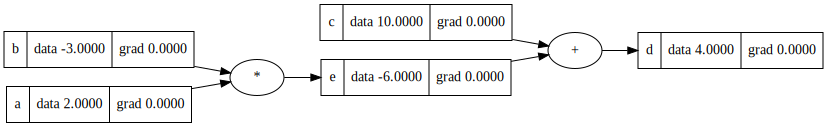

In [394]:
draw_dot(d)

In [395]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'
L

Value(data=-8.0)

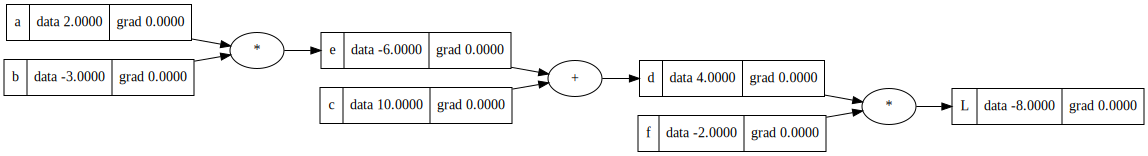

In [396]:
draw_dot(L)

In [397]:
L.grad = 1.0
d.grad = -2.0
f.grad = 4.0
c.grad = -2.0
e.grad = -2.0
a.grad = -3.0*-2.0
b.grad = 2.0*-2.0

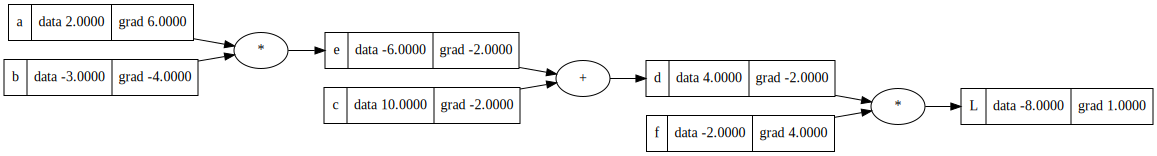

In [398]:
draw_dot(L)

In [399]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
f = Value(-2.0, label = 'f')

a.data += 0.01*a.grad
b.data += 0.01*b.grad
c.data += 0.01*c.grad
f.data += 0.01*f.grad

e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
L = d*f; L.label = 'L'
L

Value(data=-8.0)

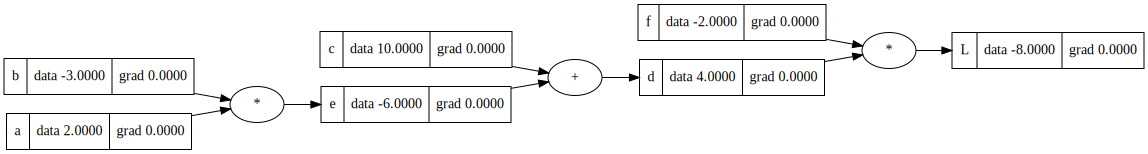

In [400]:
draw_dot(L)

In [401]:
#  This is used to manually check the gradients, nothing of any importance to the Autograd working
def lol():
  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d*f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d*f; L.label = 'L'
  L2 = L.data + h

  print((L2 - L1)/h)

lol()

1.000000000000334


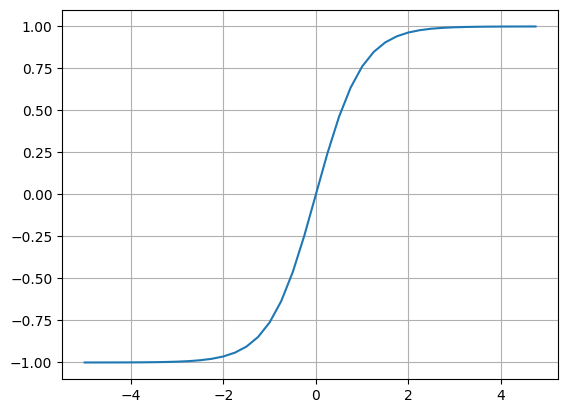

In [402]:
plt.plot(np.arange(-5, 5, 0.25), np.tanh(np.arange(-5, 5, 0.25)))
plt.grid()

In [403]:
# Now we'll start with another example

In [404]:
class Value:
  def __init__(self, data, _children=(), _op=(), label=''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})" # this is used to print a meaningful statement for debugging

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+') # internally python for a + b does a.__add__(b)

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*') # internally python for a * b does a.__mul__(b)

  def tanh(self):
    n = self.data
    t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

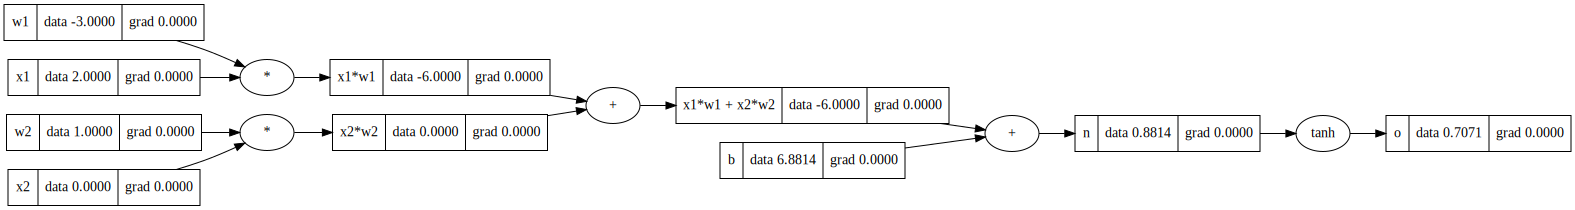

In [405]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

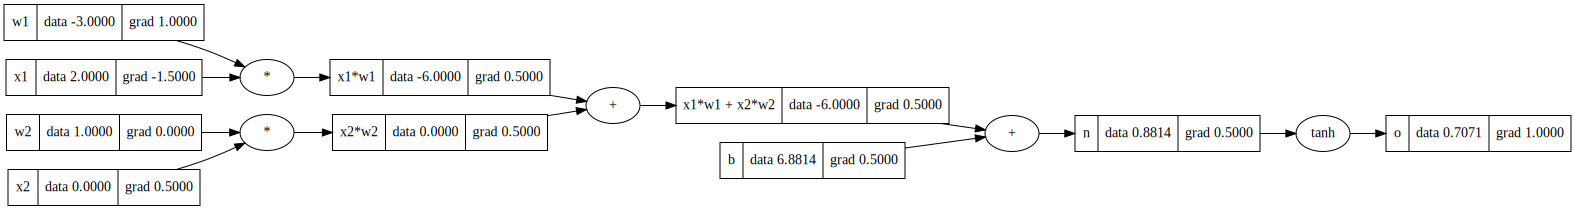

In [406]:
o.grad = 1
n.grad = 1 - o.data**2
b.grad = n.grad
x1w1x2w2.grad = n.grad
x2w2.grad = n.grad
x1w1.grad = n.grad
x2.grad = x2w2.grad*w2.data
w2.grad = x1w1.grad*x2.data
x1.grad = x1w1.grad*w1.data
w1.grad = x1w1.grad*x1.data

draw_dot(o)

In [407]:
# now lets automate this process of gradient calculation

In [408]:
class Value:
  def __init__(self, data, _children=(), _op=(), label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})" # this is used to print a meaningful statement for debugging

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+') # internally python for a + b does a.__add__(b)

    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad

    out._backward = _backward
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*') # internally python for a * b does a.__mul__(b)

    def _backward():
      self.grad += other.data*out.grad
      other.grad += self.data*out.grad

    out._backward = _backward
    return out

  def tanh(self):
    n = self.data
    t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2)*out.grad

    out._backward = _backward
    return out

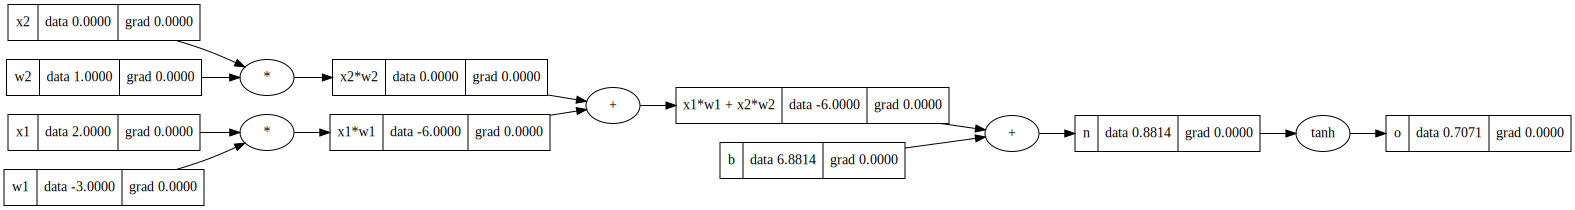

In [409]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [410]:
# To calculate the gradients of each node we call _backward function, for each node, which calculates the the gradient for us

In [411]:
o.grad = 1.0

In [412]:
o._backward()
n._backward()
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

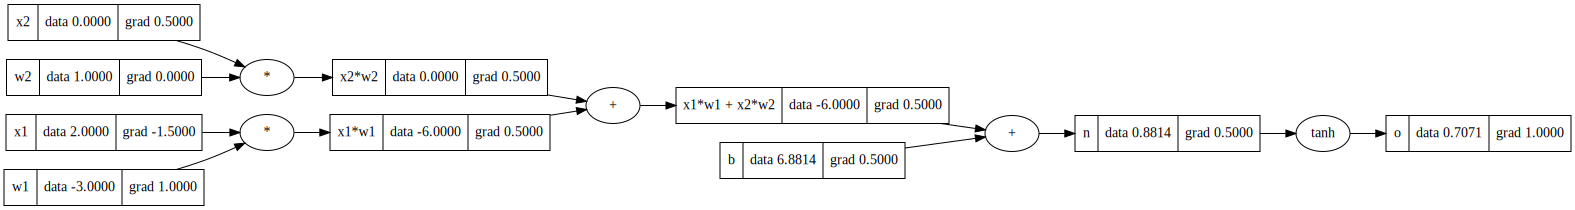

In [413]:
draw_dot(o)

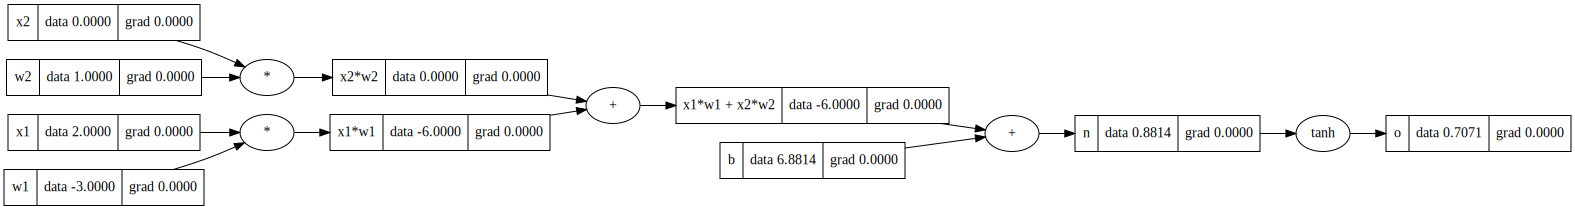

In [414]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [415]:
topo = []
visited =set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)

build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

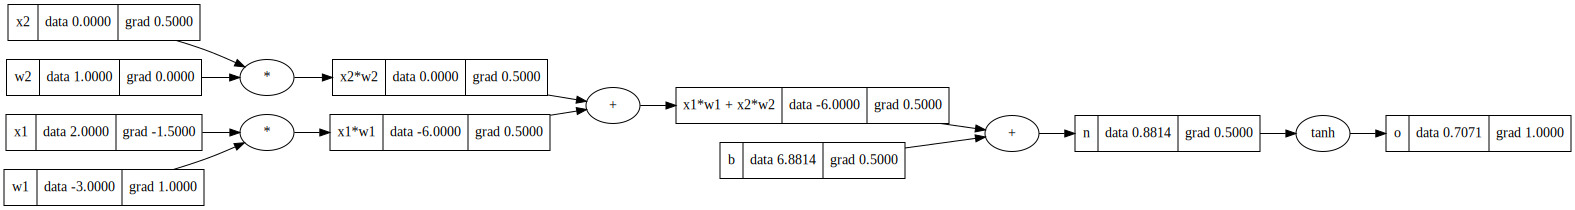

In [416]:
o.grad = 1

for node in reversed(topo):
  node._backward()

draw_dot(o)

In [417]:
class Value:
  def __init__(self, data, _children=(), _op=(), label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})" # this is used to print a meaningful statement for debugging

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+') # internally python for a + b does a.__add__(b)

    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad

    out._backward = _backward
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*') # internally python for a * b does a.__mul__(b)

    def _backward():
      self.grad += other.data*out.grad
      other.grad += self.data*out.grad

    out._backward = _backward
    return out

  def tanh(self):
    n = self.data
    t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2)*out.grad

    out._backward = _backward
    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

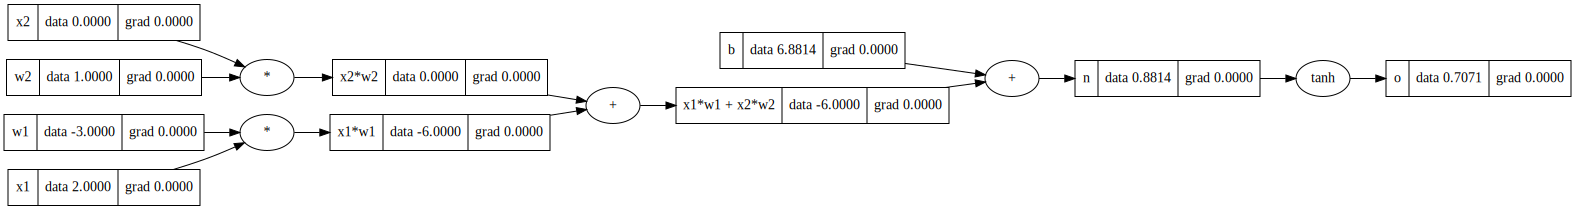

In [418]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

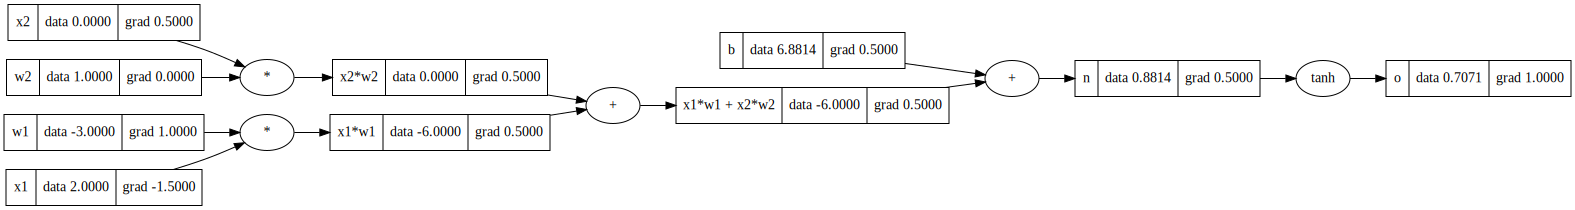

In [419]:
o.grad = 1
o.backward()
draw_dot(o)

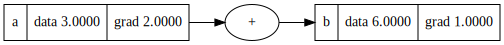

In [420]:
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)

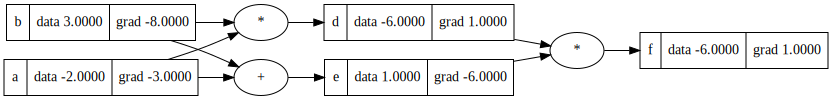

In [421]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label='d'
e = a + b; e.label='e'
f = d * e; f.label='f'

f.backward()

draw_dot(f)

In [422]:
class Value:
  def __init__(self, data, _children=(), _op=(), label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})" # this is used to print a meaningful statement for debugging

  def __rmul__(self, other): # commutes the operands
    return self*other

  def __truediv__(self,other):
    return self*other**-1

  def __neg__(self):
    return self*(-1)

  def __sub__(self, other):
    return self + (-other)

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other) # this line of code allows us to fo a + 1 type of operations, which we couldn't do earlier
    out = Value(self.data + other.data, (self, other), '+') # internally python for a + b does a.__add__(b)

    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad

    out._backward = _backward
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other) # this allows us to solve a*2 tyoes of operations
    out = Value(self.data * other.data, (self, other), '*') # internally python for a * b does a.__mul__(b)

    def _backward():
      self.grad += other.data*out.grad
      other.grad += self.data*out.grad

    out._backward = _backward
    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "int/float powers to be supported"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
      self.grad += other*(self.data**(other-1))*out.grad
    out._backward = _backward
    return out

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    n = self.data
    t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2)*out.grad

    out._backward = _backward
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data*out.grad

    out._backward = _backward
    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [423]:
# a = Value(3.0)
a = Value(2.0, label='a')
b = Value(4.0, label='b')
a*2
2*a
a.exp()
b / a
b - a
a + 7

Value(data=9.0)

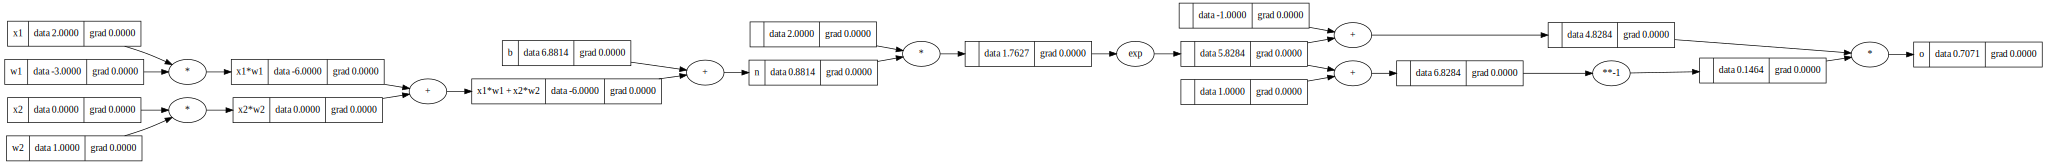

In [424]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#_____________
e = (2*n).exp()
o = (e - 1)/(e + 1)
o.label = 'o'
#____________
draw_dot(o)

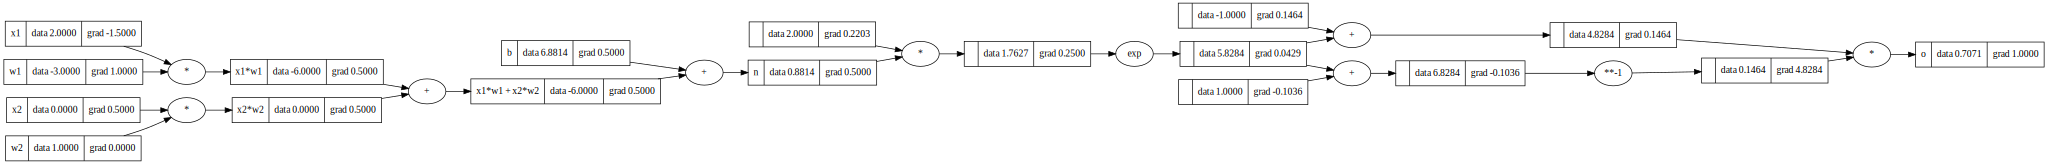

In [425]:
o.backward()
draw_dot(o)

In [426]:
import torch
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [427]:
# Here we'll be making a multilayer perceptron/ Neural Network

In [428]:
import random

class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range (nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

In [429]:
x = [2.0, 3.0]
n = Layer(2, 3) # A layer of Neuron which has 2 inputs and has 3 neurons
n(x)

[Value(data=-0.812241561699917),
 Value(data=-0.9992833883914244),
 Value(data=0.926919704248738)]

In [430]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1]) # This mean a MLP having 3 inputs and 2 intermidiate layers with 4 and 4 neurons respectively and finally 1 output
n(x)

Value(data=-0.7780455198466053)

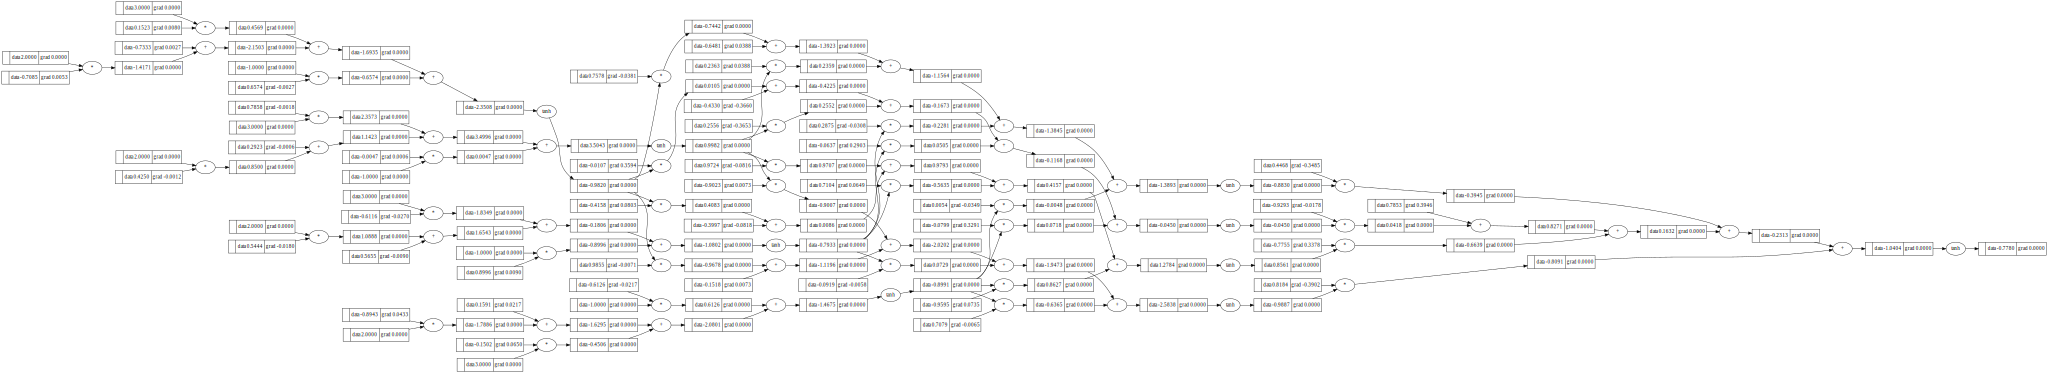

In [431]:
n(x).backward()
draw_dot(n(x))

In [432]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.7780455198466053),
 Value(data=-0.7147787231340128),
 Value(data=-0.620551495138611),
 Value(data=-0.6624635444843402)]

In [433]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) # loss function
loss

Value(data=6.150563252004629)

In [438]:
n.layers[0].neurons[0].w[0].grad

0.005315874782766875

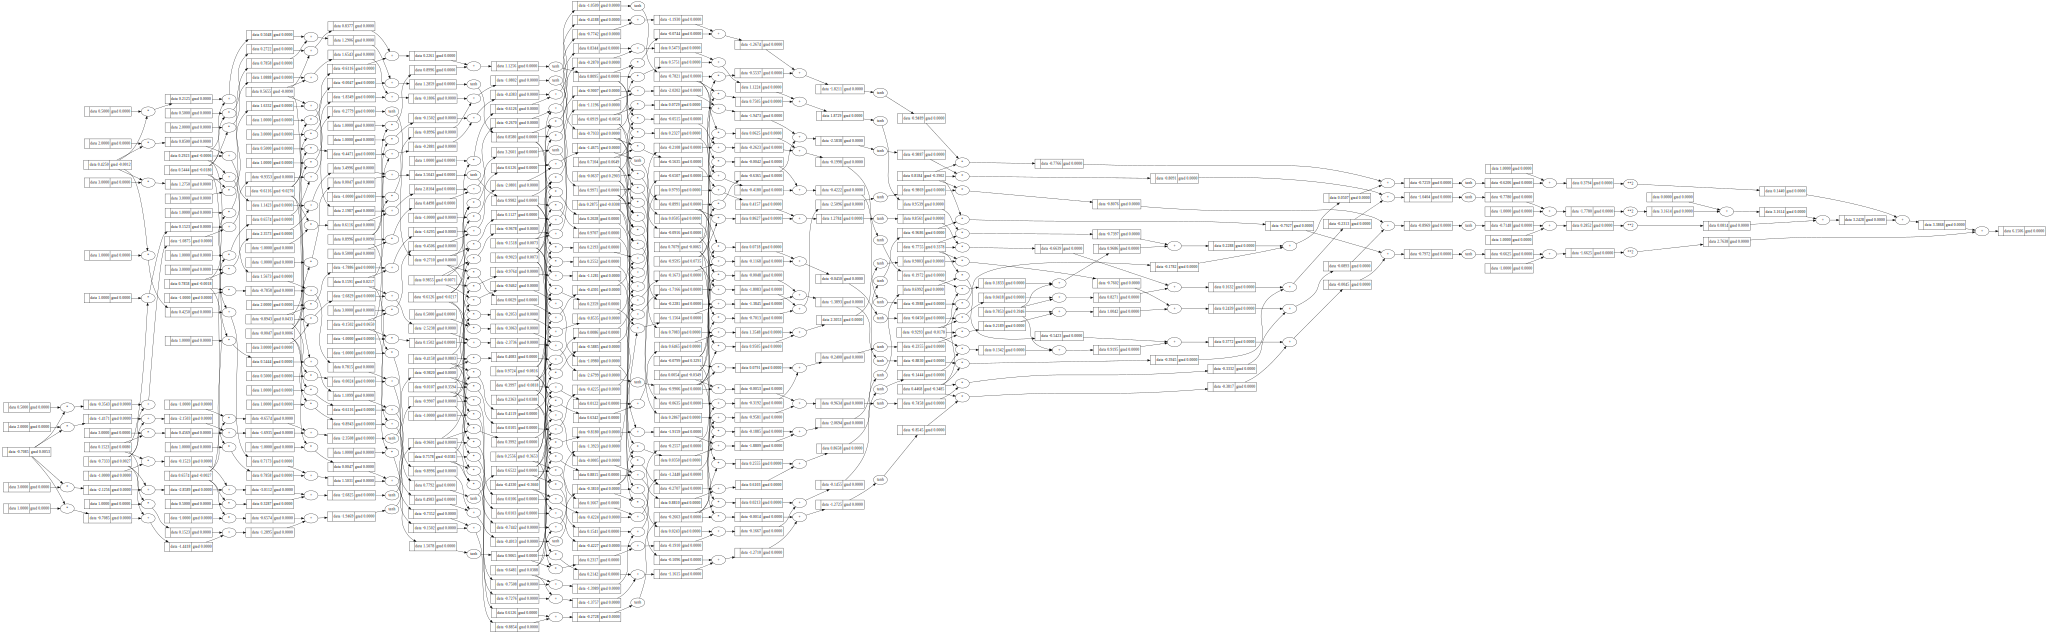

In [439]:
draw_dot(loss)

In [445]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range (nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neurons in self.neurons for p in neurons.parameters()]

class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layers in self.layers for p in layers.parameters()]

In [572]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1]) # This mean a MLP having 3 inputs and 2 intermidiate layers with 4 and 4 neurons respectively and finally 1 output
n(x)

Value(data=-0.6975262569473374)

In [472]:
len(n.parameters())

41

In [473]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

[Value(data=0.19808674680865956),
 Value(data=-0.4873175759816106),
 Value(data=-0.05917217313758935),
 Value(data=-0.5220964454261039)]

In [554]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) # loss function
loss

Value(data=9.251790823155347e-07)

In [552]:
loss.backward()

In [485]:
n.layers[0].neurons[0].w[0].data

-0.4310704699952337

In [486]:
n.layers[0].neurons[0].w[0].grad

0.5120522925624506

In [553]:
for p in n.parameters():
  p.data += -0.01*p.grad

In [560]:
ypred # now this is much closer to the desired targets

[Value(data=0.9993210549825581),
 Value(data=-0.9999579948274496),
 Value(data=-0.999961544721212),
 Value(data=0.9993210526510703)]

In [562]:
n.parameters() # these are the parameters which converges to the desired targets well

[Value(data=-3.503646194992093),
 Value(data=-3.8526671613923202),
 Value(data=3.2260100086182826),
 Value(data=-3.6621913595340296),
 Value(data=-1.8392572567403735),
 Value(data=-9.939846412874042),
 Value(data=9.699210241781214),
 Value(data=-3.911114924899641),
 Value(data=-1.0479949746418793),
 Value(data=3.4803054292289204),
 Value(data=-7.785925500389799),
 Value(data=-0.4953209742535589),
 Value(data=1.0890321774675658),
 Value(data=1.0154804070688437),
 Value(data=-5.992204651193622),
 Value(data=-0.8571673376549611),
 Value(data=-0.696845609859926),
 Value(data=-0.7142948339049828),
 Value(data=-1.0288563242698165),
 Value(data=-1.161014892069908),
 Value(data=0.21154297416388065),
 Value(data=1.9811379966193314),
 Value(data=0.3661577621087057),
 Value(data=4.033963077128684),
 Value(data=2.525583360370165),
 Value(data=2.3225103722985554),
 Value(data=1.3276055901252484),
 Value(data=0.002199794197094984),
 Value(data=0.8662951293903579),
 Value(data=2.0352146527320136),
 V

In [563]:
# Now we automate the above process of forward, backpass and the update part

In [583]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1]) # This mean a MLP having 3 inputs and 2 intermidiate layers with 4 and 4 neurons respectively and finally 1 output
n(x)

Value(data=-0.5972936123754641)

In [584]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [606]:
for k in range(20):
  #forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) # loss function

  #backward pass
  for p in n.parameters(): # bug fixed
    p.grad = 0.0 # this way we initialize the grad to zero in the start and then when we do the backward pass
  loss.backward()

  #update
  for p in n.parameters():
    p.data += -0.05*p.grad

  print(k, loss.data)

0 0.002756758956179423
1 0.0027489234961662044
2 0.0027411307633869787
3 0.0027333804133932776
4 0.002725672105407343
5 0.002718005502273621
6 0.0027103802704107416
7 0.0027027960797646744
8 0.0026952526037622533
9 0.0026877495192656198
10 0.0026802865065273457
11 0.0026728632491462064
12 0.0026654794340237233
13 0.0026581347513213
14 0.002650828894418103
15 0.0026435615598694945
16 0.002636332447366214
17 0.002629141259694089
18 0.0026219877026944336
19 0.0026148714852250133


In [607]:
ypred # the predicted values, should be as close to the targeted values

[Value(data=0.9799007683274723),
 Value(data=-0.9752001064304063),
 Value(data=-0.9729487824760504),
 Value(data=0.9706046044284506)]